<a href="https://colab.research.google.com/github/Gowr93/Project_Repository_GowriCS/blob/main/Insurance_Domain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##INSURANCE DOMAIN

PREDICTIVE MODELING FOR INSURANCE CLAIM PROBABILITY BASED ON COMPREHENSIVE CAR POLICY FEATURES AND SAFETY RATINGS


In [ ]:
# Importing the libraries

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing datset

ins_dom = pd.read_csv('/content/Data.csv')
print(ins_dom.columns.tolist())


['policy_id', 'policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating', 'is_claim']


In [ ]:
# data sample
ins_dom.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
# Data dimensions
print(ins_dom.shape)
print(f"The Number of rows in the dataset : {ins_dom.shape[0]}")
print(f"The Number of columns in the dataset: {ins_dom.shape[1]}")

(58592, 44)
The Number of rows in the dataset : 58592
The Number of columns in the dataset: 44


In [ ]:
# Missing Value analysis
# Data Preprocessing
print("Null values in the dataset:")
print(ins_dom.isnull().sum())


Null values in the dataset:
policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius        

In [ ]:
# Total number of null values in the dataset
print("Number of the null values\n")
print(ins_dom.isna().sum().sum())


Number of the null values

0


In [ ]:
# To check the duplicates in the dataset

print("Number of duplicates in the dataset:")
print(ins_dom.duplicated().sum())

Number of duplicates in the dataset:
0


In [ ]:
# To view the dataset Information
ins_dom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [ ]:
# Understanding the categorical Columns in the dataset
for col in ins_dom.columns:
  if ins_dom[col].dtype == 'O':
    print(col, ':', ins_dom[col].unique())

policy_id : ['ID00001' 'ID00002' 'ID00003' ... 'ID58590' 'ID58591' 'ID58592']
area_cluster : ['C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9' 'C10' 'C11' 'C12' 'C13'
 'C14' 'C15' 'C16' 'C17' 'C18' 'C19' 'C20' 'C21' 'C22']
segment : ['A' 'C1' 'C2' 'B2' 'B1' 'Utility']
model : ['M1' 'M2' 'M3' 'M4' 'M5' 'M6' 'M7' 'M8' 'M9' 'M10' 'M11']
fuel_type : ['CNG' 'Petrol' 'Diesel']
max_torque : ['60Nm@3500rpm' '113Nm@4400rpm' '91Nm@4250rpm' '250Nm@2750rpm'
 '200Nm@3000rpm' '82.1Nm@3400rpm' '200Nm@1750rpm' '85Nm@3000rpm'
 '170Nm@4000rpm']
max_power : ['40.36bhp@6000rpm' '88.50bhp@6000rpm' '67.06bhp@5500rpm'
 '113.45bhp@4000rpm' '88.77bhp@4000rpm' '55.92bhp@5300rpm'
 '97.89bhp@3600rpm' '61.68bhp@6000rpm' '118.36bhp@5500rpm']
engine_type : ['F8D Petrol Engine' '1.2 L K12N Dualjet' '1.0 SCe' '1.5 L U2 CRDi'
 '1.5 Turbocharged Revotorq' 'K Series Dual jet' '1.2 L K Series Engine'
 'K10C' 'i-DTEC' 'G12B' '1.5 Turbocharged Revotron']
is_esc : ['No' 'Yes']
is_adjustable_steering : ['No' 'Yes']
is_tpms : ['No

In [ ]:
# Since the dataset contains both numeric and categorical features,
# we will do pre- processing separately for both of them.

#Checking for the numerical and categorical features from input dataset

numerical_feature = ins_dom.select_dtypes(include = ['int64', 'float64']).columns
print(numerical_feature)

print("*****************************************")

categorical_feature = ins_dom.select_dtypes(include = ['object']).columns
print(categorical_feature)


Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')
*****************************************
Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')


In [ ]:
print(f"Count of Numerical features : {len(numerical_feature)}")
print(f"Count of Categorical features: {len(categorical_feature)}")


Count of Numerical features : 16
Count of Categorical features: 28


In [ ]:
# Checking for the descriptive Summary

ins_dom.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


=============Numerical Features Visualization =============


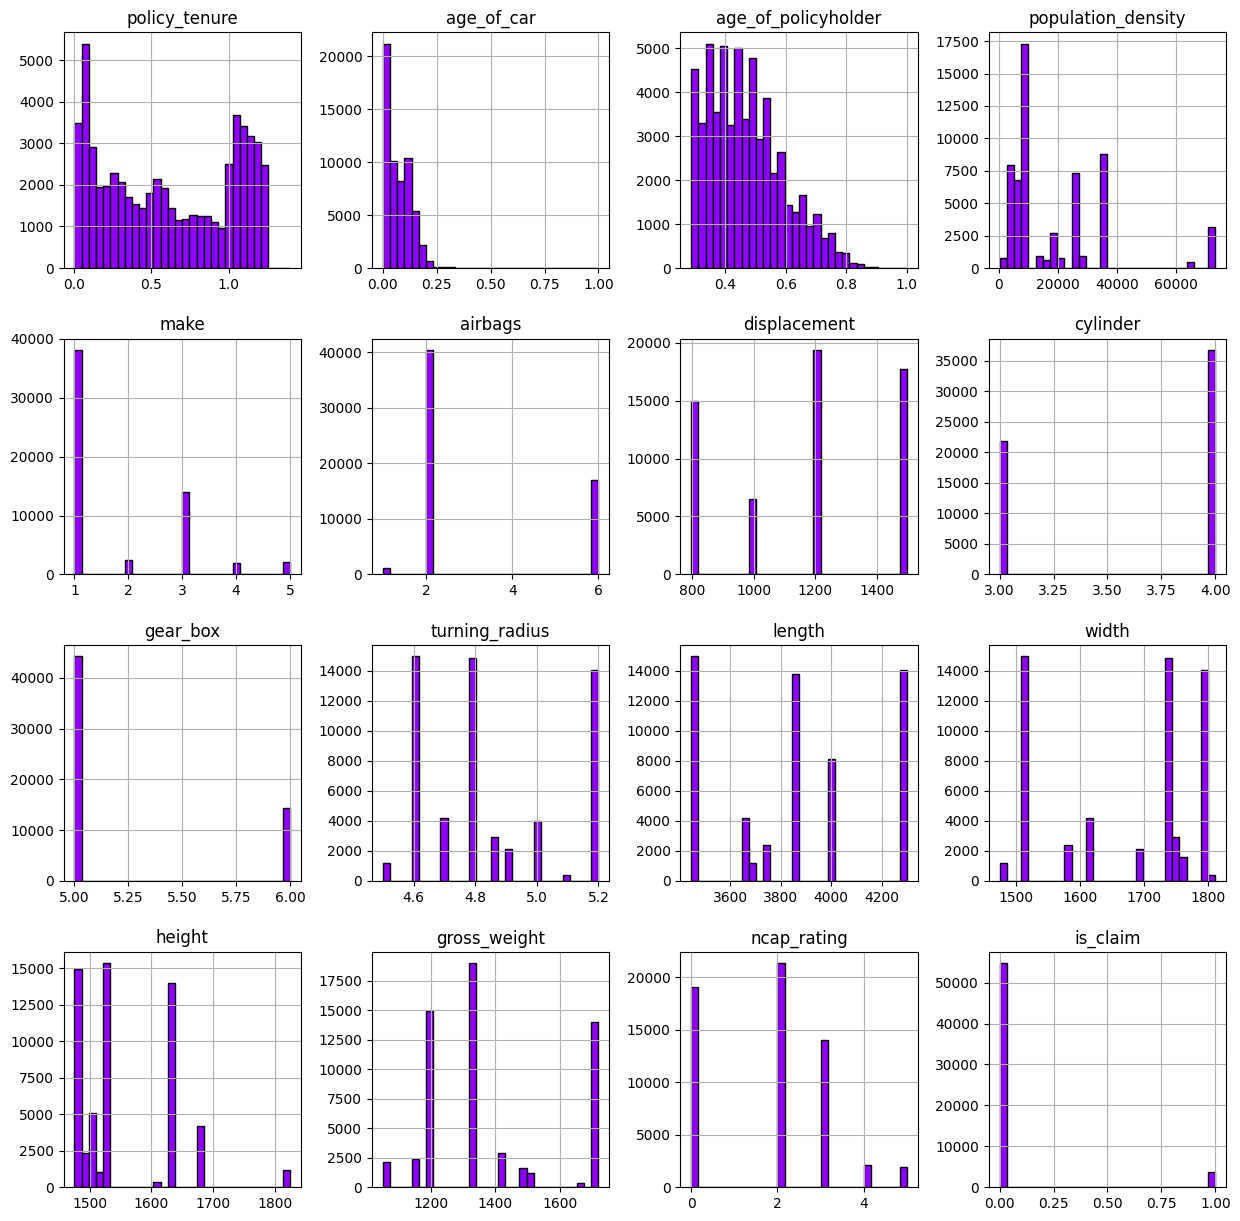

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object') | Skewness: policy_tenure          0.05
age_of_car             1.09
age_of_policyholder    0.64
population_density     1.67
make                   1.20
airbags                0.91
displacement          -0.11
cylinder              -0.53
gear_box               1.18
turning_radius         0.42
length                 0.15
width                 -0.49
height                 1.04
gross_weight           0.55
ncap_rating            0.09
is_claim               3.56
dtype: float64


In [ ]:
# Displaying the numerical features
print("=============Numerical Features Visualization =============")
ins_dom[numerical_feature].hist(bins = 30 , figsize =(15,15),color = '#8F00FF' , edgecolor = 'black')
plt.show()

print(f"{numerical_feature} | Skewness: {round(ins_dom[numerical_feature].skew(), 2)}")

## Observations



1.   Considering mean & median values, we can say that there is no significant high difference between them across all columns, except for "Population density"
2.   From the above observation, we can conclude that there is no high variance in data distribution



In [ ]:
# Splitting the data into independent and dependent variables
# Independent variables(Input dataset)
# Dependent variables (Output dataset)
#  [policy_id] is non-significant column
# [is_claim ] is dependent column

# Input dataset
X = ins_dom.drop(['policy_id','is_claim'], axis = 1)
print("The shape of dataset:", X.shape)
# Output dataset
y = ins_dom['is_claim']
print("The shape of dataset:", y.shape)


The shape of dataset: (58592, 42)
The shape of dataset: (58592,)


In [ ]:
# Displaying the X dataset
X.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2


In [ ]:
# Displaying the y dataset
y.head()

,is_claim
0,0
1,0
2,0
3,0
4,0


In [ ]:
print(X.columns.tolist())

['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'make', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'airbags', 'is_esc', 'is_adjustable_steering', 'is_tpms', 'is_parking_sensors', 'is_parking_camera', 'rear_brakes_type', 'displacement', 'cylinder', 'transmission_type', 'gear_box', 'steering_type', 'turning_radius', 'length', 'width', 'height', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert', 'ncap_rating']


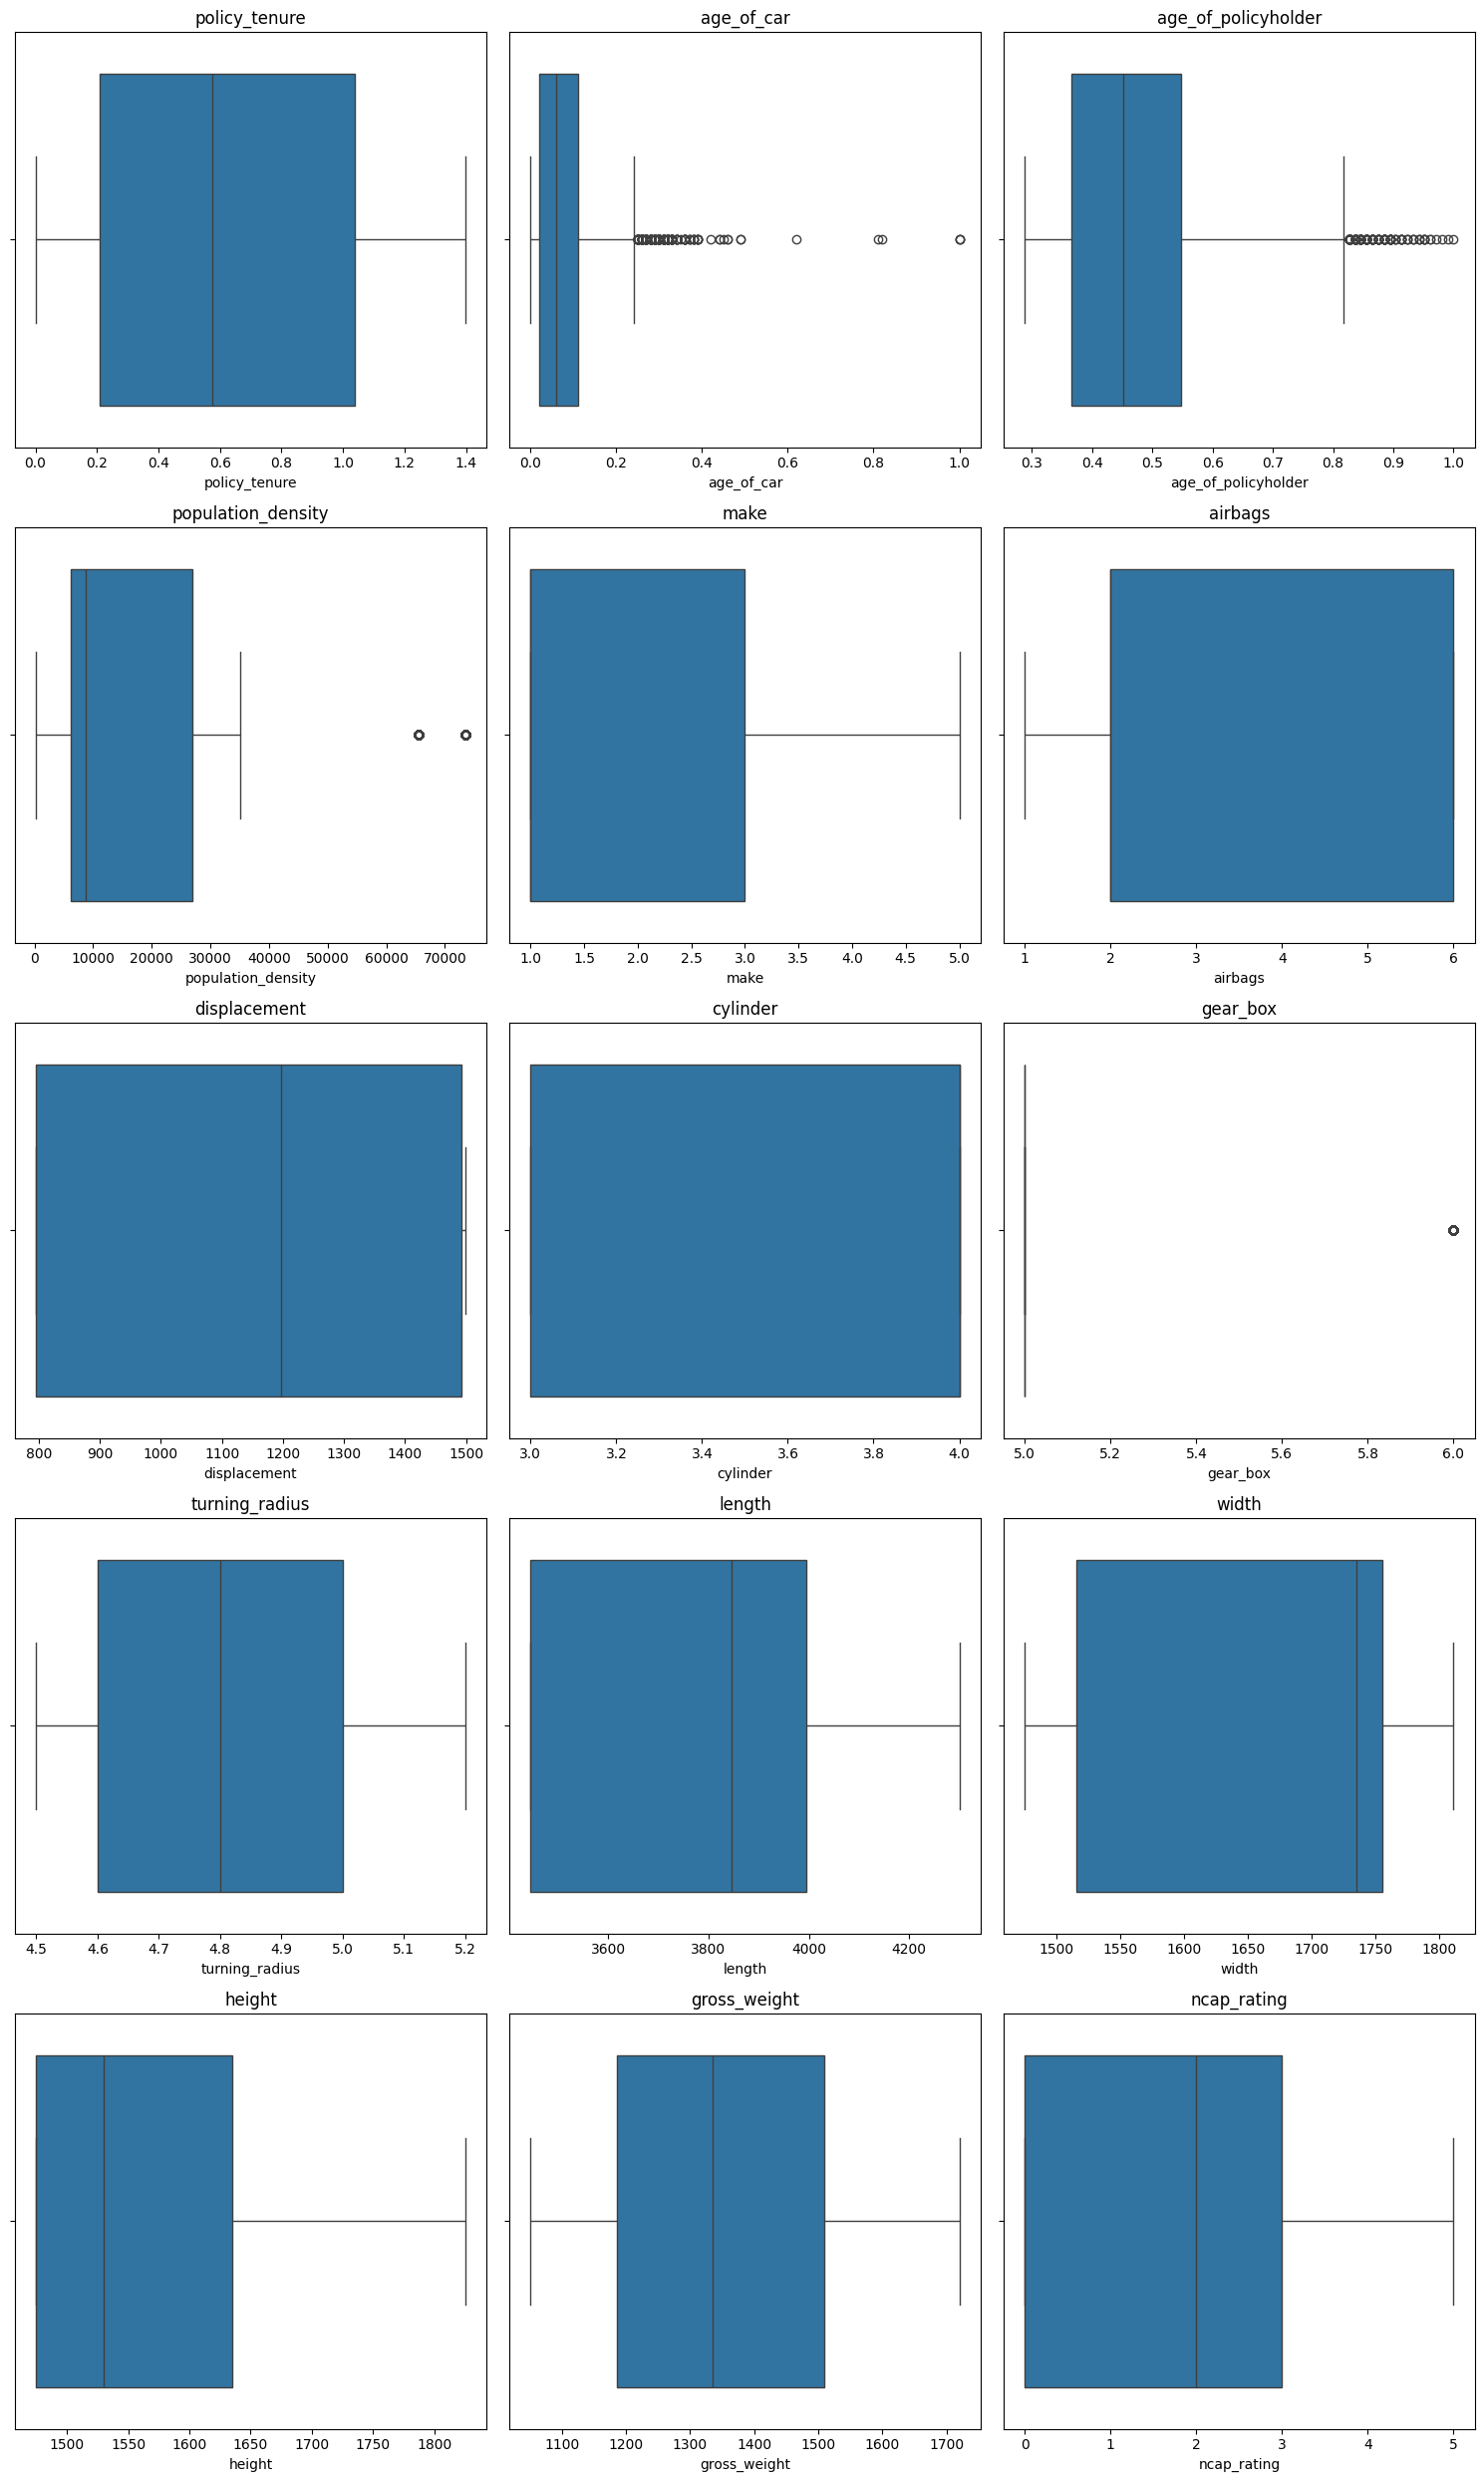

In [ ]:
# Outliers  detection using box plots  in subplots

# Importing necessary libraries
import math
# number of numerical columns
# Filter numerical_feature to only include columns present in X
numerical_feature = [col for col in numerical_feature if col in X.columns]
n = len(numerical_feature)

# rows & cols for subplots
cols = 3
rows = math.ceil(n / cols)

plt.figure(figsize=(15, 5 * rows))

for index, col in enumerate(numerical_feature):
    plt.subplot(rows, cols, index + 1)
    sns.boxplot(x=X[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
# Removing the outliers from the dataset
Q1 = X[numerical_feature].quantile(0.25)
Q3 = X[numerical_feature].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5 * IQR
LL = Q1 - 1.5 * IQR

print("Upper Limit")
print()
print(UL)
print("***********************************")
print("Lower LImit")
print()
print(LL)

Upper Limit

policy_tenure              2.282386
age_of_car                 0.245000
age_of_policyholder        0.822115
population_density     58339.500000
make                       6.000000
airbags                   12.000000
displacement            2538.500000
cylinder                   5.500000
gear_box                   5.000000
turning_radius             5.600000
length                  4820.000000
width                   2115.000000
height                  1875.000000
gross_weight            1997.500000
ncap_rating                7.500000
dtype: float64
***********************************
Lower LImit

policy_tenure             -1.033032
age_of_car                -0.115000
age_of_policyholder        0.091346
population_density    -25224.500000
make                      -2.000000
airbags                   -4.000000
displacement            -249.500000
cylinder                   1.500000
gear_box                   5.000000
turning_radius             4.000000
length                 

In [ ]:
# Checking overall outliers for all the columns

Outliers_per_col = ((X[numerical_feature] > UL) | (X[numerical_feature] < LL)).sum()
Outliers_per_col

,0
policy_tenure,0
age_of_car,269
age_of_policyholder,221
population_density,3647
make,0
airbags,0
displacement,0
cylinder,0
gear_box,14381
turning_radius,0


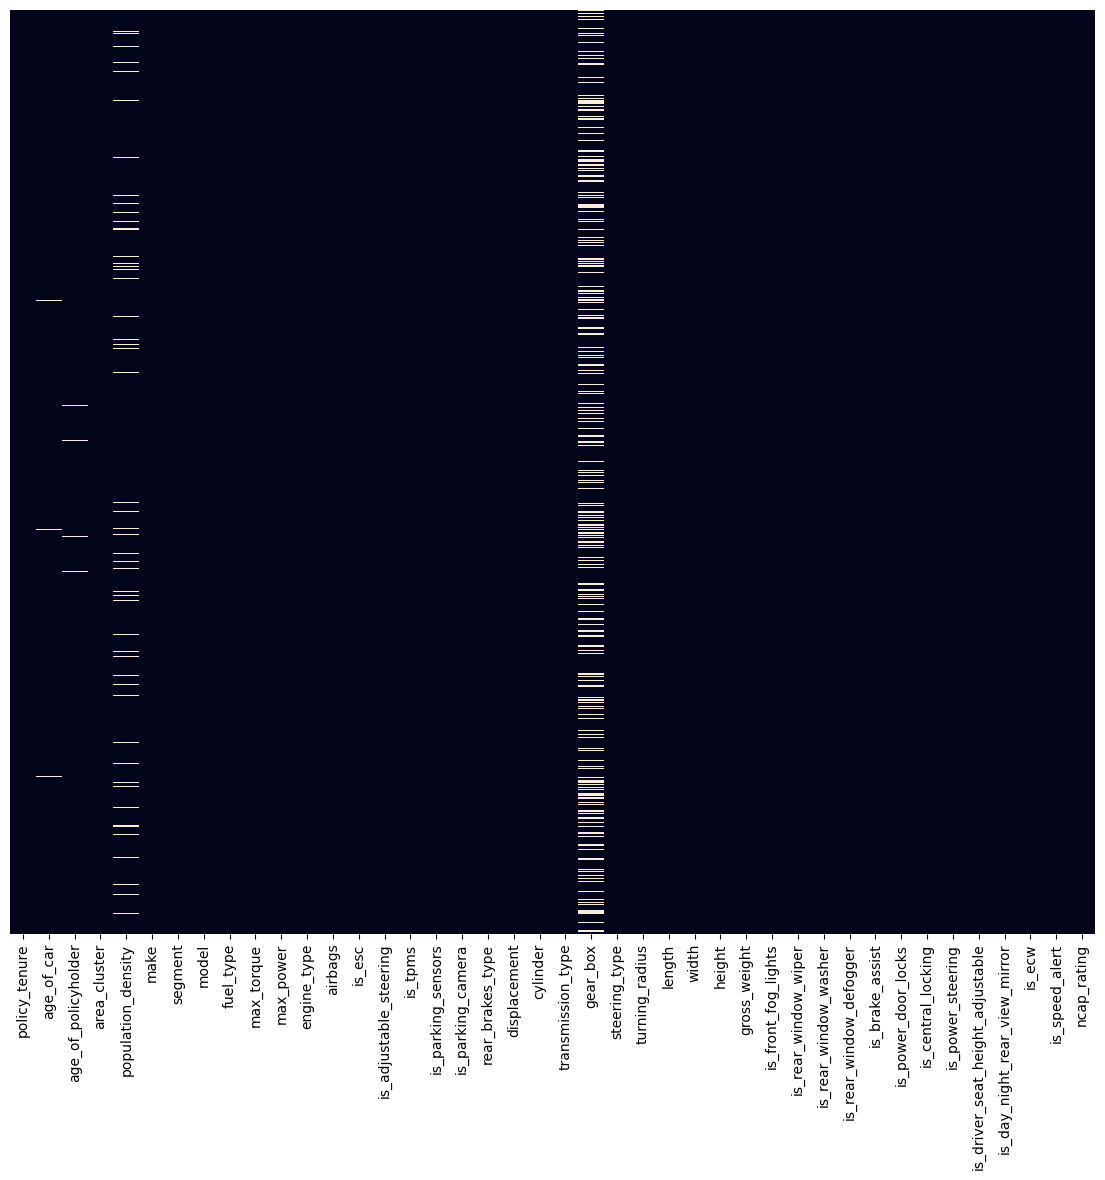

In [ ]:
# Handling Outliers -- Applying the capping method using KNN Imputation

# Converted outliers into NAN values
X[(X[numerical_feature] > UL) | (X[numerical_feature] < LL)] = np.nan

# Plotting heatmap highlighting missing data, that are actually outlier values

plt.figure(figsize = (14,12))
sns.heatmap(X.isnull(), cbar = False, yticklabels = False)

plt.show()

In [ ]:
# Imputing NaN values (outlier values using KNN (K -Nearest Neighbour) Imputer with n_neighbors  = 10)

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
X_imputed = pd.DataFrame(imputer.fit_transform(X[numerical_feature]), columns = X[numerical_feature].columns)
X_imputed

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
0,0.515874,0.05,0.644231,4990.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
1,0.672619,0.02,0.375000,27003.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
2,0.841110,0.02,0.384615,4076.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
3,0.900277,0.11,0.432692,21622.0,1.0,2.0,1197.0,4.0,5.0,4.8,3995.0,1735.0,1515.0,1335.0,2.0
4,0.596403,0.11,0.634615,34738.0,2.0,2.0,999.0,3.0,5.0,5.0,3731.0,1579.0,1490.0,1155.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794.0,2.0,2.0,999.0,3.0,5.0,5.0,3731.0,1579.0,1490.0,1155.0,2.0
58588,1.199642,0.02,0.519231,7788.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
58589,1.162273,0.05,0.451923,34738.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
58590,1.236307,0.14,0.557692,8794.0,1.0,2.0,1197.0,4.0,5.0,4.8,3845.0,1735.0,1530.0,1335.0,2.0


In [ ]:
# Checking missing values
X_imputed.isnull().sum().sum()

np.int64(0)

In [ ]:
# All missing values(outliers) values in input numerical features have been replaced using KNN imputation method
Outliers_per_col_updated = (((X_imputed)> UL) | ((X_imputed) < LL)).isnull().sum()
Outliers_per_col_updated

,0
policy_tenure,0
age_of_car,0
age_of_policyholder,0
population_density,0
make,0
airbags,0
displacement,0
cylinder,0
gear_box,0
turning_radius,0


In [ ]:
# Correlation analysis (using pearson correlation) - To check
# the relationship between input numerical features and output features
correlations = {}

for col in numerical_feature:
    corr = X[col].corr(y, method = 'pearson')
    correlations[col] = corr

correlations

{'policy_tenure': np.float64(0.07874744763543107),
 'age_of_car': np.float64(-0.027017085006553483),
 'age_of_policyholder': np.float64(0.019703808702662404),
 'population_density': np.float64(-0.004877136563445144),
 'make': np.float64(-0.0004558037477077472),
 'airbags': np.float64(0.0027887938669193192),
 'displacement': np.float64(0.007677847692265177),
 'cylinder': np.float64(0.013433592933080489),
 'gear_box': np.float64(nan),
 'turning_radius': np.float64(0.002724222929158889),
 'length': np.float64(0.006494537973319108),
 'width': np.float64(0.009947051749073451),
 'height': np.float64(-0.002023534166778217),
 'gross_weight': np.float64(0.003894402920704144),
 'ncap_rating': np.float64(0.003800070947475651)}

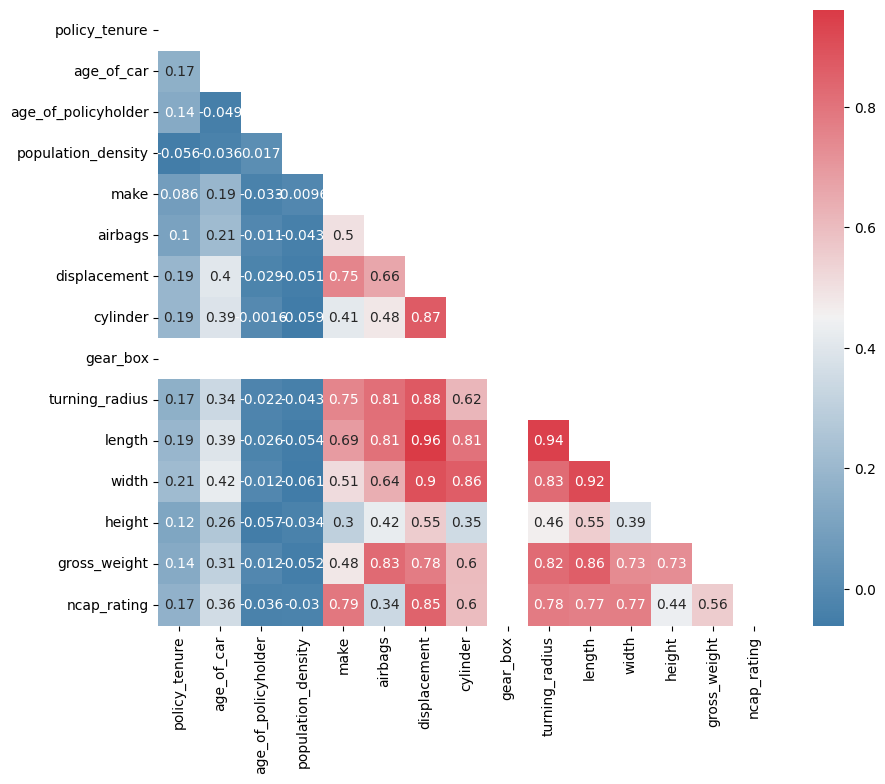

In [ ]:
# heatmap for correlation
f, ax = plt.subplots(figsize=(10, 8))
corr = X.corr(numeric_only=True)
sns.heatmap(corr, annot=True,
            mask = np.triu(corr),
            cmap = sns.diverging_palette(240, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [ ]:
# Analysis of the Categorical features in input

categorical_feature = [col for col in categorical_feature if col in X.columns]
X[categorical_feature].head()

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes


In [ ]:
# Performing chi-square test to check relationship between input categorical features and
#output feature

# Importing necessary libraries
from scipy.stats import chi2_contingency

chi_result = {}

for col in categorical_feature:
  contigency_table = pd.crosstab(X[col], y)
  chi2, p, _, _ = chi2_contingency(contigency_table)
  chi_result[col] = (chi2, p)

print("\n Chi_square Test Results:")
print()

# Defining hypothesis

# Null hypothesis (Ho) - There is no significant relationship
# Alternate hypothesis (Ha) - There exists a significant relationship

for key, value in chi_result.items():
  print(f"{key}: chi2 = {value[0] : 0.4f}, p-value = {value[1]:.4f}")
  if value[1] < 0.05:
    print(f"Null hyposthesis is rejected, {key} has significant relationship.\n")
  else:
    print(f"Failed to reject Null hypothesi: {key} has no significant relationship\n")


 Chi_square Test Results:

area_cluster: chi2 =  96.0826, p-value = 0.0000
Null hyposthesis is rejected, area_cluster has significant relationship.

segment: chi2 =  12.6039, p-value = 0.0274
Null hyposthesis is rejected, segment has significant relationship.

model: chi2 =  19.9750, p-value = 0.0295
Null hyposthesis is rejected, model has significant relationship.

fuel_type: chi2 =  5.7596, p-value = 0.0561
Failed to reject Null hypothesi: fuel_type has no significant relationship

max_torque: chi2 =  19.3883, p-value = 0.0129
Null hyposthesis is rejected, max_torque has significant relationship.

max_power: chi2 =  19.3883, p-value = 0.0129
Null hyposthesis is rejected, max_power has significant relationship.

engine_type: chi2 =  19.9750, p-value = 0.0295
Null hyposthesis is rejected, engine_type has significant relationship.

is_esc: chi2 =  0.4995, p-value = 0.4797
Failed to reject Null hypothesi: is_esc has no significant relationship

is_adjustable_steering: chi2 =  11.2315, p

In [ ]:
# Bifurcation categorical columns having significant and non-significant relationships
# with o/p variables

print("Column having significant relationship with output variable: \n")

for key , value in chi_result.items():
  if value[1]< 0.05:
    print(f'{key}')

print("***********************************************")
print("Columns with no significant relationship: \n")

for key, value in chi_result.items():
  if value[1] > 0.05:
    print(f'{key}')


Column having significant relationship with output variable: 

area_cluster
segment
model
max_torque
max_power
engine_type
is_adjustable_steering
is_parking_sensors
is_front_fog_lights
is_brake_assist
is_driver_seat_height_adjustable
***********************************************
Columns with no significant relationship: 

fuel_type
is_esc
is_tpms
is_parking_camera
rear_brakes_type
transmission_type
steering_type
is_rear_window_wiper
is_rear_window_washer
is_rear_window_defogger
is_power_door_locks
is_central_locking
is_power_steering
is_day_night_rear_view_mirror
is_ecw
is_speed_alert


In [ ]:
# Input dataset with updated numerical features
X[numerical_feature] = X_imputed
X.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,0.515874,0.05,0.644231,C1,4990.0,1.0,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0
1,0.672619,0.02,0.375000,C2,27003.0,1.0,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0
2,0.841110,0.02,0.384615,C3,4076.0,1.0,A,M1,CNG,60Nm@3500rpm,...,No,No,No,No,Yes,No,No,No,Yes,0.0
3,0.900277,0.11,0.432692,C4,21622.0,1.0,C1,M2,Petrol,113Nm@4400rpm,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2.0
4,0.596403,0.11,0.634615,C5,34738.0,2.0,A,M3,Petrol,91Nm@4250rpm,...,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_tenure                     58592 non-null  float64
 1   age_of_car                        58592 non-null  float64
 2   age_of_policyholder               58592 non-null  float64
 3   area_cluster                      58592 non-null  object 
 4   population_density                58592 non-null  float64
 5   make                              58592 non-null  float64
 6   segment                           58592 non-null  object 
 7   model                             58592 non-null  object 
 8   fuel_type                         58592 non-null  object 
 9   max_torque                        58592 non-null  object 
 10  max_power                         58592 non-null  object 
 11  engine_type                       58592 non-null  object 
 12  airb

In [ ]:
# Numerical featues in X
X_num = X_imputed
X_num

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating
0,0.515874,0.05,0.644231,4990.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
1,0.672619,0.02,0.375000,27003.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
2,0.841110,0.02,0.384615,4076.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
3,0.900277,0.11,0.432692,21622.0,1.0,2.0,1197.0,4.0,5.0,4.8,3995.0,1735.0,1515.0,1335.0,2.0
4,0.596403,0.11,0.634615,34738.0,2.0,2.0,999.0,3.0,5.0,5.0,3731.0,1579.0,1490.0,1155.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794.0,2.0,2.0,999.0,3.0,5.0,5.0,3731.0,1579.0,1490.0,1155.0,2.0
58588,1.199642,0.02,0.519231,7788.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
58589,1.162273,0.05,0.451923,34738.0,1.0,2.0,796.0,3.0,5.0,4.6,3445.0,1515.0,1475.0,1185.0,0.0
58590,1.236307,0.14,0.557692,8794.0,1.0,2.0,1197.0,4.0,5.0,4.8,3845.0,1735.0,1530.0,1335.0,2.0


In [ ]:
# Categorical features in X
X_cat = X[categorical_feature]
X_cat

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,...,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
0,C1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
1,C2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
2,C3,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
3,C4,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Yes,Yes,No,...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,C5,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,C8,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,No,No,No,...,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes
58588,C14,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58589,C5,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,No,No,No,...,No,No,No,No,No,Yes,No,No,No,Yes
58590,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,...,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [ ]:
# Displaying the Numerical features and categorical features

X_num_features = X_num.columns
print("Numerical Features in X dataset \n", X_num_features)

print()

X_cat_features = X_cat.columns
print("Categorical Features in X dataset \n", X_cat_features)

print()

X_totalfeaturs = X.columns
print("Total number of Features\n",X_totalfeaturs)

Numerical Features in X dataset 
 Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating'],
      dtype='object')

Categorical Features in X dataset 
 Index(['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque',
       'max_power', 'engine_type', 'is_esc', 'is_adjustable_steering',
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

Total number of Features
 Index(['policy_tenure', 'age_of_

Creating the column transformer - to convert input dataset into numerical values


In [ ]:
# Importing necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), X_num_features),
                                               ('cat', OneHotEncoder(sparse_output=False), X_cat_features)])

preprocessor


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating'],
      dtype='object')),
                                ('cat', OneHotEncoder(sparse_output=False),
                                 Index(['area_cluster', 'segmen...
       'is_tpms', 'is_parking_sensors', 'is_parking_camera',
       'rear_brakes_type', 'transmission_type', 'steering_type',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object'))])

In [ ]:
# Updated input dataset
preprocessor.set_output(transform = 'pandas')
X_new = preprocessor.fit_transform(X)
X_new

,num__policy_tenure,num__age_of_car,num__age_of_policyholder,num__population_density,num__make,num__airbags,num__displacement,num__cylinder,num__gear_box,num__turning_radius,...,cat__is_power_steering_No,cat__is_power_steering_Yes,cat__is_driver_seat_height_adjustable_No,cat__is_driver_seat_height_adjustable_Yes,cat__is_day_night_rear_view_mirror_No,cat__is_day_night_rear_view_mirror_Yes,cat__is_ecw_No,cat__is_ecw_Yes,cat__is_speed_alert_No,cat__is_speed_alert_Yes
0,-0.230283,-0.341038,1.461875,-0.932809,-0.671712,-0.620458,-1.375713,-1.296417,0.0,-1.108893,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.148188,-0.897105,-0.771575,1.058372,-0.671712,-0.620458,-1.375713,-1.296417,0.0,-1.108893,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.555022,-0.897105,-0.691809,-1.015485,-0.671712,-0.620458,-1.375713,-1.296417,0.0,-1.108893,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.697883,0.771096,-0.292979,0.571635,-0.671712,-0.620458,0.130093,0.771357,0.0,-0.231926,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.035840,0.771096,1.382109,1.758040,0.207812,-0.620458,-0.613422,-1.296417,0.0,0.645040,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,-0.618508,1.141808,1.461875,-0.588719,0.207812,-0.620458,-0.613422,-1.296417,0.0,0.645040,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
58588,1.420720,-0.897105,0.424916,-0.679717,-0.671712,-0.620458,-1.375713,-1.296417,0.0,-1.108893,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
58589,1.330490,-0.341038,-0.133446,1.758040,-0.671712,-0.620458,-1.375713,-1.296417,0.0,-1.108893,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
58590,1.509251,1.327163,0.743981,-0.588719,-0.671712,-0.620458,0.130093,0.771357,0.0,-0.231926,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0


In [ ]:
# To view the information about the X_new
X_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Columns: 127 entries, num__policy_tenure to cat__is_speed_alert_Yes
dtypes: float64(127)
memory usage: 56.8 MB


In [ ]:
# Output data
y = ins_dom['is_claim']
y.value_counts()
# Imbalanced dataset


,count
is_claim,
0,54844
1,3748


In [ ]:
y.value_counts(normalize = True)

,proportion
is_claim,
0,0.936032
1,0.063968


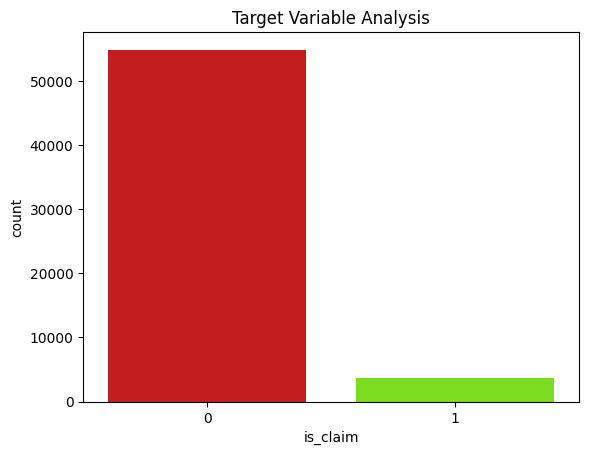

In [ ]:
# Plotting the targer variable  using seaborn
sns.countplot(x = y, data = ins_dom, palette= ["#DF0101","#7CFC00"])
plt.title("Target Variable Analysis")
plt.show()

In [ ]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size = 0.2, random_state = 42, stratify = y)

# Stratified output data (y), in order to deal with imbalancing in dependent features

Checking performance of different models without fixing data imbalance issue



>We will consider following Algorithms for determining the claim status -

1. Logistic Regression
2. Support Vector Machine
3. Naive Bayes
4. Decision Tree
5. Random Forest
6. Gradient Boosting
7. ADA Boosting





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # Corrected import
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, f1_score, precision_score

In [ ]:
# Defining the function to check different parameters for a model
def classify(model):
  print(f"Model Name: { model }")
  model.fit(X_train, y_train)
  print(f'Train Accuracy:{ model.score(X_train, y_train)}')
  y_pred = model.predict(X_test)
  print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
  print()
  print(f'Confusion Matrix: \n {confusion_matrix(y_test,y_pred)}')
  print()
  print(f'Classification Report :{classification_report(y_test, y_pred)}')
  print()
  print(f'ROC-auc-score :{roc_auc_score(y_test,y_pred)}')



## Logistic Regression

In [ ]:
classify(LogisticRegression())

Model Name: LogisticRegression()
Train Accuracy:0.9359959037378393
Test Accuracy: 0.9360413022144473

Confusion Matrix: [[43876     0]
 [ 2998     0]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      1.00      0.97     43876
           1       0.00      0.00      0.00      2998

    accuracy                           0.94     46874
   macro avg       0.47      0.50      0.48     46874
weighted avg       0.88      0.94      0.91     46874


ROC-auc-score :0.5


##Support Vector Machine

In [ ]:
classify(SVC())

Model Name: SVC()
Train Accuracy:0.9359959037378393
Test Accuracy: 0.9360413022144473

Confusion Matrix: [[43876     0]
 [ 2998     0]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      1.00      0.97     43876
           1       0.00      0.00      0.00      2998

    accuracy                           0.94     46874
   macro avg       0.47      0.50      0.48     46874
weighted avg       0.88      0.94      0.91     46874


ROC-auc-score :0.5


## Naive Bayes

In [ ]:
classify(GaussianNB())

Model Name: GaussianNB()
Train Accuracy:0.17110428400750982
Test Accuracy: 0.16102743525195204

Confusion Matrix: [[ 4868 39008]
 [  318  2680]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      0.11      0.20     43876
           1       0.06      0.89      0.12      2998

    accuracy                           0.16     46874
   macro avg       0.50      0.50      0.16     46874
weighted avg       0.88      0.16      0.19     46874


ROC-auc-score :0.5024391621946767


## Decision Tree Classifier

In [ ]:
classify(DecisionTreeClassifier())

Model Name: DecisionTreeClassifier()
Train Accuracy:1.0
Test Accuracy: 0.8705892392371037

Confusion Matrix: [[40540  3336]
 [ 2730   268]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      0.92      0.93     43876
           1       0.07      0.09      0.08      2998

    accuracy                           0.87     46874
   macro avg       0.51      0.51      0.51     46874
weighted avg       0.88      0.87      0.88     46874


ROC-auc-score :0.5066802367591704


In [ ]:
# Cross Validating Decision Tree, since its providing 100% training accuracy

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the Decision Tree Classifier
dt_model = DecisionTreeClassifier()

 # Perform k-fold cross validation
cv_scores = cross_val_score(dt_model, X_train, y_train, cv = 5, scoring = "accuracy")
# 5 -fold cross validation

print("Cross Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross Validation Scores: [0.87329352 0.86945392 0.88139932 0.86726419 0.87836108]
Mean Accuracy: 0.8739544048862417
Standard Deviation: 0.005297084532485671


## Random Forest Classifier

In [ ]:
classify(RandomForestClassifier())

Model Name: RandomForestClassifier()
Train Accuracy:0.9999146612049837
Test Accuracy: 0.9325212271195119

Confusion Matrix: 
 [[43688   188]
 [ 2975    23]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      1.00      0.97     43876
           1       0.11      0.01      0.01      2998

    accuracy                           0.93     46874
   macro avg       0.52      0.50      0.49     46874
weighted avg       0.88      0.93      0.90     46874


ROC-auc-score :0.5016934892809385


In [ ]:
# Cross validation Random Forest for Overfitting, since model is providing 99 % training accuracy

from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators= 100, random_state= 42)

# Perform the k-fold cross-validation
scores = cross_val_score(rf, X_train, y_train, cv = 5, scoring = 'accuracy')

# printing the scores
print("Cross Validation Scores:", scores)
print("Mean Cross-Validation score:", scores.mean())
print("Standard deviation:", scores.std())

Cross Validation Scores: [0.93259386 0.93302048 0.93472696 0.9346991  0.93213828]
Mean Cross-Validation score: 0.9334357369784954
Standard deviation: 0.0010796244693979961


In [ ]:
# Random Forest Classifier with max depth (calculated and n_estimators as 100 assumed)

no_of_features = len(X_train.columns)
print(no_of_features)
print()

depth = int(np.log2(no_of_features))
print(depth)

127

6


In [ ]:
classify(RandomForestClassifier(n_estimators=100, max_depth = depth, random_state = 101))

Model Name: RandomForestClassifier(max_depth=6, random_state=101)
Train Accuracy:0.9359959037378393
Test Accuracy: 0.9360413022144473

Confusion Matrix: 
 [[43876     0]
 [ 2998     0]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      1.00      0.97     43876
           1       0.00      0.00      0.00      2998

    accuracy                           0.94     46874
   macro avg       0.47      0.50      0.48     46874
weighted avg       0.88      0.94      0.91     46874


ROC-auc-score :0.5


## Ada Boosting

In [ ]:
classify(AdaBoostClassifier())

Model Name: AdaBoostClassifier()
Train Accuracy:0.9359959037378393
Test Accuracy: 0.9360413022144473

Confusion Matrix: 
 [[43876     0]
 [ 2998     0]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      1.00      0.97     43876
           1       0.00      0.00      0.00      2998

    accuracy                           0.94     46874
   macro avg       0.47      0.50      0.48     46874
weighted avg       0.88      0.94      0.91     46874


ROC-auc-score :0.5


In [ ]:
# Splitting the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_new, y, train_size=0.80, random_state=42, stratify=y)

## Using SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

ctr = Counter(y_train)
print('Before', ctr)

# Over sampling the train dataset using SMOTE
sm = SMOTE(sampling_strategy = 0.8, random_state=42)

X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

ctr = Counter(y_train_sm)
print('After', ctr)



Before Counter({0: 43875, 1: 2998})
After Counter({0: 43875, 1: 35100})


In [ ]:
# Updated input training dataset after resampling
X_train_updated = pd.concat([X_train_sm], axis = 1)
X_train_updated.head()

,num__policy_tenure,num__age_of_car,num__age_of_policyholder,num__population_density,num__make,num__airbags,num__displacement,num__cylinder,num__gear_box,num__turning_radius,...,cat__is_power_steering_No,cat__is_power_steering_Yes,cat__is_driver_seat_height_adjustable_No,cat__is_driver_seat_height_adjustable_Yes,cat__is_day_night_rear_view_mirror_No,cat__is_day_night_rear_view_mirror_Yes,cat__is_ecw_No,cat__is_ecw_Yes,cat__is_speed_alert_No,cat__is_speed_alert_Yes
0,-0.767652,2.068586,0.026086,1.758040,-0.671712,-0.620458,0.130093,0.771357,0.0,-0.231926,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,-0.525558,0.400385,-1.090640,-0.894818,-0.671712,-0.620458,-0.617177,-1.296417,0.0,-0.670410,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,1.104859,-0.711749,1.142811,-0.588719,-0.671712,-0.620458,0.130093,0.771357,0.0,-0.231926,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,-0.019526,0.215029,1.461875,1.758040,-0.671712,-0.620458,0.130093,0.771357,0.0,-0.231926,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.528986,-1.082460,0.504682,-0.894818,-0.671712,-0.620458,-1.375713,-1.296417,0.0,-1.108893,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


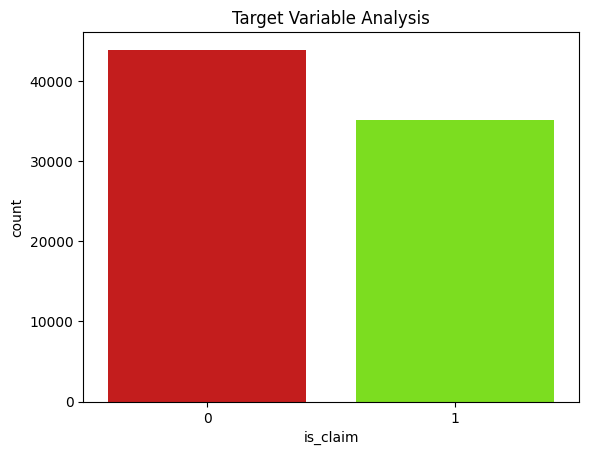

In [ ]:
# Plotting the target variable using seaborn
sns.countplot(x = y_train_sm, palette= ["#DF0101","#7CFC00"])
plt.title("Target Variable Analysis")
plt.show()

In [ ]:
# Defining the function to check different parameters for a model
def classify(model):
  print(f"Model Name: { model }")
  model.fit(X_train_sm, y_train_sm) # Fit the model on the oversampled data
  print(f'Train Accuracy:{ model.score(X_train_sm, y_train_sm)}') # Score on the oversampled data
  y_pred = model.predict(X_test)
  print(f'Test Accuracy: {accuracy_score(y_test, y_pred)}')
  print()
  print(f'Confusion Matrix: \n {confusion_matrix(y_test,y_pred)}')
  print()
  print(f'Classification Report :{classification_report(y_test, y_pred)}')
  print()
  print(f'ROC-auc-score :{roc_auc_score(y_test,y_pred)}')

## Logistic Regression

In [ ]:
classify(LogisticRegression())

Model Name: LogisticRegression()
Train Accuracy:0.5555555555555556
Test Accuracy: 0.9360013653042069

Confusion Matrix: 
 [[10969     0]
 [  750     0]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719


ROC-auc-score :0.5


## Support Vector Machine

In [ ]:
classify(SVC())

Model Name: SVC()
Train Accuracy:0.5555555555555556
Test Accuracy: 0.9360013653042069

Confusion Matrix: 
 [[10969     0]
 [  750     0]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719


ROC-auc-score :0.5


## Naive Bayes

In [ ]:
classify(GaussianNB())

Model Name: GaussianNB()
Train Accuracy:0.5538588160810383
Test Accuracy: 0.5987712262138408

Confusion Matrix: 
 [[6686 4283]
 [ 419  331]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      0.61      0.74     10969
           1       0.07      0.44      0.12       750

    accuracy                           0.60     11719
   macro avg       0.51      0.53      0.43     11719
weighted avg       0.89      0.60      0.70     11719


ROC-auc-score :0.5254346491627921


## Decision Tree Classifier

In [ ]:
classify(DecisionTreeClassifier())

Model Name: DecisionTreeClassifier()
Train Accuracy:0.7304083570750237
Test Accuracy: 0.8720027306084137

Confusion Matrix: 
 [[10166   803]
 [  697    53]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      0.93      0.93     10969
           1       0.06      0.07      0.07       750

    accuracy                           0.87     11719
   macro avg       0.50      0.50      0.50     11719
weighted avg       0.88      0.87      0.88     11719


ROC-auc-score :0.4987301789892728


In [ ]:
from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()

#perform k-fold cross validation
cv_scores = cross_val_score(model, X_train_sm, y_train_sm, cv = 5, scoring='accuracy')

print("Cross validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross validation Scores: [0.81968978 0.91288382 0.90851535 0.90889522 0.91206078]
Mean Accuracy: 0.892408990186768
Standard Deviation: 0.036399743211891974


## Random Forest Classifier

In [ ]:
classify(RandomForestClassifier())


Model Name: RandomForestClassifier()
Train Accuracy:0.685318138651472
Test Accuracy: 0.9310521375543989

Confusion Matrix: 
 [[10906    63]
 [  745     5]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      0.99      0.96     10969
           1       0.07      0.01      0.01       750

    accuracy                           0.93     11719
   macro avg       0.50      0.50      0.49     11719
weighted avg       0.88      0.93      0.90     11719


ROC-auc-score :0.5004616039140608


In [ ]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
scores = cross_val_score(rf, X_train_sm, y_train_sm, cv=5, scoring='accuracy')  # 5-fold cross-validation

# Print the scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())
print("Standard deviation:", scores.std())

Cross-validation scores: [0.85520734 0.9178221  0.92250712 0.91959481 0.92111428]
Mean cross-validation score: 0.9072491294713517
Standard deviation: 0.02606760244585536


In [ ]:
# Calculating the number of input features

no_of_features = len(X_train_sm.columns)
print(no_of_features)
print()


# Calculating max-depth

depth = int(np.log2(no_of_features))
print(depth)

127

6


In [ ]:
classify(RandomForestClassifier(n_estimators= 100, max_depth= depth, random_state= 101))

## Gradient Boosting

In [ ]:
classify(GradientBoostingClassifier())

Model Name: GradientBoostingClassifier()
Train Accuracy:0.5558847736625514
Test Accuracy: 0.9358307022783514

Confusion Matrix: 
 [[10967     2]
 [  750     0]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.90     11719


ROC-auc-score :0.4999088339866898


## Ada Boosting

In [ ]:
classify(AdaBoostClassifier())

Model Name: AdaBoostClassifier()
Train Accuracy:0.5555555555555556
Test Accuracy: 0.9360013653042069

Confusion Matrix: 
 [[10969     0]
 [  750     0]]

Classification Report :              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10969
           1       0.00      0.00      0.00       750

    accuracy                           0.94     11719
   macro avg       0.47      0.50      0.48     11719
weighted avg       0.88      0.94      0.91     11719


ROC-auc-score :0.5


Feature extraction from RandomForest - quantifying the importance of features to do the correct classification.

In [ ]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train_sm,y_train_sm)

Feature_Rank = pd.DataFrame({'feature': X_train_sm.columns, 'importance:': modelRF.feature_importances_})

# Sorting the rank of features according to their importances. Extracting top 10 features.

rank_sorted = Feature_Rank.sort_values('importance:', ascending = False)
rank_sorted.head(10)

,feature,importance:
0,num__policy_tenure,0.287401
1,num__age_of_car,0.280617
2,num__age_of_policyholder,0.263887
3,num__population_density,0.035785
35,cat__area_cluster_C8,0.012326
26,cat__area_cluster_C2,0.007703
16,cat__area_cluster_C10,0.007334
30,cat__area_cluster_C3,0.007111
19,cat__area_cluster_C13,0.006752
36,cat__area_cluster_C9,0.006329


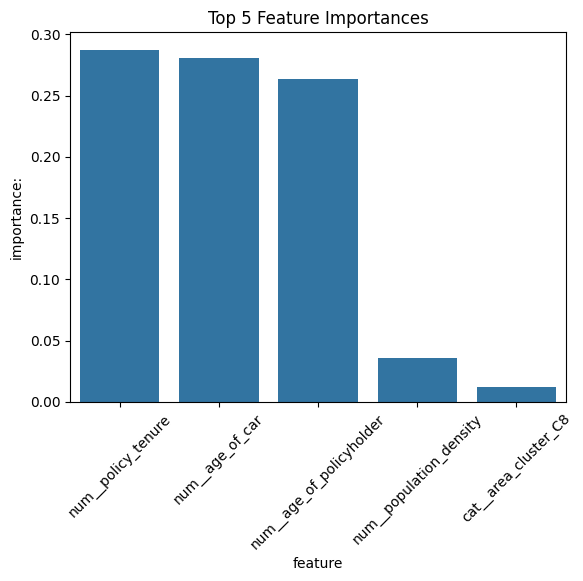

In [ ]:
# Visualising the features
sns.barplot(x = 'feature', y = 'importance:', data = rank_sorted.head(5))
plt.xticks(rotation = 45)
plt.title('Top 5 Feature Importances')
plt.show()


## Observations


Most important features for the insurance company to consider in predicting claim status from customers are -



*  Policy Tenure
*  Age of Car
*  Age of policy holder
*  Population Density
*  Area Cluster










In [ ]:
# Saving the model

import joblib

In [ ]:
joblib.dump(model,'Insurance_Prediction_Model.pk1')


['Insurance_Prediction_Model.pk1']

In [ ]:
# Load the model
model= joblib.load('Insurance_Prediction_Model.pk1')